# greedy choose point part

In [1]:
import numpy as np
def calculate_distance(idx_list, eucli_data):
    C=0
    reward_record = [0]
    for i in range(len(idx_list)-1):
        dis = euc_dis(eucli_data[idx_list[i][0]],eucli_data[idx_list[i][1]])
        dis += euc_dis(eucli_data[idx_list[i][1]],eucli_data[idx_list[i+1][0]])
        C += dis
        reward_record.append(C)
    return reward_record
def calculate_wait_time(idx_list, reward_record,waiting_time,visit_count_rec):
    idx_time = zip(idx_list,reward_record)
    idx_time = sorted(idx_time, key=lambda x: x[0])
    print(idx_time)
    total_idx = 0
    extra_waiting_time = 0
    for item in visit_count_rec:
        compare_list = []
        if item>1:
            for i in range(int(item)):
                compare_list.append(idx_time[int(total_idx + i)][1])
            compare_list.sort(reverse=True)
            total_idx += item
            for i in range(len(compare_list)-1):
                dis_step = compare_list[i] - compare_list[i+1]
                dry_time = waiting_time
                if (dis_step) < (dry_time):
                    extra_waiting_time += dry_time - dis_step
        else:
            total_idx += item
    return extra_waiting_time
def identify_rec_type(eucli_data, gluewidth):
    rec_type_list = []
    for LDpoint, RDpoint, RUpoint, LUpoint in zip(eucli_data[0::4], eucli_data[1::4], eucli_data[2::4], eucli_data[3::4]):
        length = euc_dis(LDpoint,LUpoint)
        width = euc_dis(LDpoint,RDpoint)
        if width > length:
            if int(length/gluewidth)%2 == 0:
                rec_type_list.append(0)
            else:
                rec_type_list.append(1)
        else:
            if int(width/gluewidth)%2 == 0:
                rec_type_list.append(2)
            else:
                rec_type_list.append(3)
    return rec_type_list
def idx_pair(idx):
    index = [idx]
    rec_type = rec_type_list[int(idx/4)]
    if rec_type == 0:
        if idx%4 == 0:
            index.append(idx+3)
        elif idx%4 ==1:
            index.append(idx+1)
        elif idx%4 ==2:
            index.append(idx-1)
        else:
            index.append(idx-3)
    elif rec_type == 1 or rec_type == 3:
        if idx%4 == 0:
            index.append(idx+2)
        elif idx%4 ==1:
            index.append(idx+2)
        elif idx%4 ==2:
            index.append(idx-2)
        else:
            index.append(idx-2)
    elif rec_type == 2:
        if idx%4 == 0:
            index.append(idx+1)
        elif idx%4 ==1:
            index.append(idx-1)
        elif idx%4 ==2:
            index.append(idx+1)
        else:
            index.append(idx-1)
    
    return index
def euc_dis(point1,point2):
    return ((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)**0.5
def choose_point(start_point, corner_point, visit_time, waiting_list, index_eucli, total_dis, waiting_time):
    total_dis += euc_dis(start_point[1],corner_point[1])
    waiting_list -= euc_dis(start_point[1],corner_point[1])
    waiting_list[waiting_list<0] = 0
    # consider the cost of waiting time and adjust the visit time when coating a region
    recent_rec_idx = int(corner_point[0]/4)
    visit_time[recent_rec_idx] -= 1
    if visit_time[recent_rec_idx] == 0:
        for i in range(4):
            index_eucli[recent_rec_idx*4+i][0] = None
    else:
        if waiting_list[recent_rec_idx] == 0:
            waiting_list[recent_rec_idx] = waiting_time
        else:
            total_dis += waiting_list[recent_rec_idx]
            waiting_list -= waiting_list[recent_rec_idx]
            waiting_list[waiting_list<0] = 0
            waiting_list[recent_rec_idx] = waiting_time
    pure_dis = []
    for idx_euc in index_eucli:
        if idx_euc[0] != None:
            pure_dis.append([idx_euc[0],euc_dis(corner_point[1],idx_euc[1])+waiting_list[int(idx_euc[0]/4)]])
    if len(pure_dis)>0 :
        pure_dis = np.array(pure_dis)
        temp = np.argmin(pure_dis, axis=0)
        temp_1 = pure_dis[temp[1]][0]
        new_start_point = index_eucli_initial[int(temp_1)]
        # now we know the next point and region we gonna visit, time to calculate the distance and waiting time
        total_dis += euc_dis(corner_point[1], new_start_point[1])
        waiting_list -= euc_dis(corner_point[1], new_start_point[1])
        waiting_list[waiting_list<0] = 0
        recent_rec_idx = int(new_start_point[0]/4)
        if waiting_list[recent_rec_idx] == 0:
            waiting_list[recent_rec_idx] = waiting_time
        else:
            total_dis += waiting_list[recent_rec_idx]
            waiting_list -= waiting_list[recent_rec_idx]
            waiting_list[waiting_list<0] = 0
            waiting_list[recent_rec_idx] = waiting_time
    else:
        new_start_point = None
    
    return new_start_point,total_dis

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4]
[96, 98, 76, 79, 98, 96, 76, 79, 98, 96, 76, 79, 98, 96, 64, 67, 78, 77, 0, 1, 4, 5, 16, 18, 28, 29, 63, 61, 40, 42, 45, 47, 48, 49, 72, 75, 88, 91, 74, 73, 88, 91, 74, 73, 88, 91, 74, 73, 38, 39, 34, 35, 57, 59, 26, 27, 54, 52, 11, 10, 15, 13, 20, 21, 71, 68, 95, 92, 69, 70, 95, 92, 69, 70, 95, 92, 69, 70, 95, 92, 88, 91, 82, 80, 85, 86, 83, 81, 85, 86, 83, 81, 85, 86, 83, 81, 85, 86]

/var/folders/f0/2zn4dfyd00q7qh4n33qz93nm0000gn/T/ipykernel_37511/745011133.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  index_eucli_initial = np.array(index_eucli_initial)



49
49
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4]
[([0], 898.5339035660932), ([1], 982.617172698053), ([2], 2949.6830761438077), ([3], 3046.2512254841395), ([4], 1057.0435795692458), ([5], 3179.2352666826323), ([6], 2667.9492209806954), ([7], 1176.7910950730138), ([8], 2401.4942682498154), ([9], 2331.665054248193), ([10], 1426.749933938377), ([11], 1573.3898132769891), ([12], 1712.7480701950647), ([13], 2758.7139531705247), ([14], 2458.0804966980827), ([15], 1238.6779854959748), ([16], 737.9119489663037), ([17], 3439.6279431132452), ([17], 3613.1829682792545), ([17], 3733.3257685956287), ([17], 3853.468568912003), ([18], 1796.6967543833655), ([18], 1948.7795061189586), ([18], 2063.52726480076), ([18], 2178.2750234825608), ([19], 83.17041204853886), ([19], 278.5169396711321), ([19], 473.8634672937253), ([19], 784.9336778327464), ([20], 4848.334581391729), ([20], 5015.6215418393285), ([20], 5235.703790870261), ([20], 5455.786039901194), ([21], 4947.482232

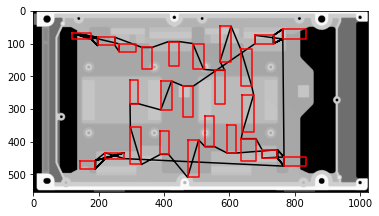

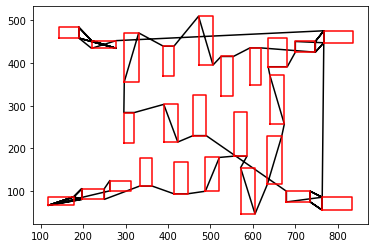

In [2]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import yaml
####### my own import file ##########
from listofpathpoint import input_handler
import cnc_input
#from hybrid_models import HPN
####### my own import file ##########
data_dimension = 4
waiting_time = 300
ROI_num = 25
gluewidth = 11
data_generate = input_handler('10&15data/25_chips/25_GCN_17.json')
data_visit = data_generate.GCN_ver_points()
data_visit = np.array(data_visit[0])
data_visit = data_visit.reshape(int(len(data_visit)/4),4,4)
eucli_data = data_generate.every_point()
rec_type_list = identify_rec_type(eucli_data, gluewidth)
visit_time = data_visit[:,:,data_dimension-1]
visit_time_initial = data_visit[:,:,data_dimension-1]
visit_time = visit_time[:,0]
visit_time_initial = visit_time_initial[:,0]
visit_time_initial = np.array(visit_time_initial)
print(visit_time)
edge_list = []
index_temp = [i for i in range(len(eucli_data))]
index_eucli = []
index_eucli_initial = []
waiting_list = np.zeros(len(eucli_data))
idx_recorder = []
best_idx_recorder = []
best_dis = 100000
for item1, item2 in zip(index_temp, eucli_data):
    index_eucli.append([item1, item2])
    index_eucli_initial.append([item1, item2])
index_eucli_initial = np.array(index_eucli_initial)
for idx in range(len(eucli_data)):
    index = idx_pair(idx)
    edge_list.append(index)
for point in index_eucli_initial:
    idx_recorder = []
    total_dis = 0
    start_point = point
    idx_recorder.append(point[0])
    index_eucli = index_eucli_initial.tolist()
    visit_time = visit_time_initial.tolist()
    while(sum(visit_time) > 0):
        corner_point = index_eucli_initial[edge_list[start_point[0]][1]]
        idx_recorder.append(corner_point[0])
        # decide the next 'start point' by calculate the distance around all points, including corner_point
        start_point,total_dis = choose_point(start_point, corner_point, visit_time, 
                                   waiting_list, index_eucli, total_dis, waiting_time)
        if sum(visit_time) > 0:
            idx_recorder.append(start_point[0])
    if total_dis < best_dis:
        best_idx_recorder = idx_recorder
        best_dis = total_dis
    idx_path_gazebo = []
    idx_path_best = []
#     for idx1,idx2 in zip(idx_recorder[0::2], idx_recorder[1::2]):
#         idx_path_gazebo.append([idx1,idx2])
#     the_resent_path = data_generate.zig_zag_path(idx_path_gazebo)
#     the_resent_path = data_generate.zig_zag_path(idx_path_gazebo)
print(best_idx_recorder)
for idx1,idx2 in zip(best_idx_recorder[0::2], best_idx_recorder[1::2]):
    idx_path_gazebo.append([idx1,idx2])
    idx_path_best.append([int(idx1/4)])
#test_path = 
reward_record = calculate_distance(idx_path_gazebo, eucli_data)
print(len(reward_record))
print(len(idx_path_gazebo))
visit_time = visit_time_initial.tolist()
print(visit_time)
extra_time = calculate_wait_time(idx_path_best, reward_record,waiting_time,visit_time)
print(reward_record[-1] + extra_time)

the_resent_path = data_generate.zig_zag_path(idx_path_gazebo)
the_resent_path = data_generate.zig_zag_path(idx_path_gazebo)

In [3]:
import torch
index = int(9.34)
table = [[1,2],[3,4]]
table_1 = [[3,44],[5,6]]
table = torch.as_tensor(table)
table_1 = torch.as_tensor(table_1)
result = torch.maximum(table_1[:,0],table_1[:,1])
print(result)

tensor([44,  6])


In [4]:
import numpy as np
a = [[1, 1], [2, 2], [0, 3]]
print(a.shape)
a = np.insert(a, 1, 5)
a = a[a[0,:].argsort()]
print(a)

AttributeError: 'list' object has no attribute 'shape'